## Task 1

In [ ]:
!pip install cirq

     |████████████████████████████████| 541 kB 53.6 MB/s 
     |████████████████████████████████| 593 kB 58.6 MB/s 
     |████████████████████████████████| 1.8 MB 51.5 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 48 kB 7.2 MB/s 
     |████████████████████████████████| 220 kB 74.4 MB/s 
     |████████████████████████████████| 65 kB 5.2 MB/s 
     |████████████████████████████████| 53 kB 3.2 MB/s 
     |████████████████████████████████| 97 kB 9.0 MB/s 
     |████████████████████████████████| 52 kB 2.0 MB/s 
     |████████████████████████████████| 10.1 MB 39.1 MB/s 
     |████████████████████████████████| 145 kB 77.0 MB/s 
     |████████████████████████████████| 49 kB 8.0 MB/s 
     |████████████████████████████████| 229 kB 76.4 MB/s 
     |████████████████████████████████| 44 kB 3.7 MB/s 
     |████████████████████████████████| 38.1 MB 182 kB/s 
     |████████████████████████████████| 243 kB 51.6 MB/s 
     |███████████████████████

In [ ]:
import cirq as q
import numpy as np

## 1.

In [ ]:
qubits = q.LineQubit.range(5)

In [ ]:
circuit = q.Circuit()

In [ ]:
circuit.append(q.H(i) for i in qubits)
circuit.append(q.CNOT(i, i+1) for i in qubits[:4])
circuit.append(q.SWAP(qubits[0],qubits[4]))
circuit.append(q.rx(np.pi/2).on(qubits[0]))
circuit.append(q.measure(i) for i in qubits)

In [ ]:
print(circuit)

                          ┌──┐
0: ───H───@────────────────×─────Rx(0.5π)───M───
          │                │
1: ───H───X───@───M────────┼────────────────────
              │            │
2: ───H───────X───@───M────┼────────────────────
                  │        │
3: ───H───────────X───@────┼M───────────────────
                      │    │
4: ───H───────────────X────×─────M──────────────
                          └──┘


In [ ]:
from cirq import Simulator
simulator = Simulator()
result = simulator.run(circuit, repetitions=20)

In [ ]:
print(result)

0=01101101011010101100
1=11100100010101101101
2=00001010010110011111
3=00001100111010100100
4=00110011011100111010


## 2.


In [ ]:
import random
qubits = q.LineQubit.range(1)
circuit = q.Circuit()

series = 1000
probs = []
for i in range(series):
  circuit.append(q.rx(random.random()*np.pi/(70-1)).on(qubits[0]))

for step in simulator.simulate_moment_steps(circuit):
    prob = np.abs(step.state_vector()) ** 2
    probs.append(prob[0])

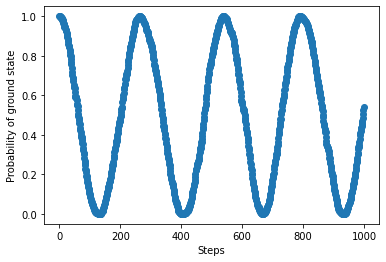

In [ ]:
from matplotlib import pyplot as plt
plt.plot(probs, 'o')
plt.xlabel("Steps")
plt.ylabel("Probability of ground state");

In [ ]:
print(circuit)

0: ───Rx(0.01π)───Rx(0.003π)───Rx(0.007π)───Rx(0.012π)───Rx(0.01π)───Rx(0.003π)───Rx(0.014π)───Rx(0.004π)───Rx(0.004π)───Rx(0.009π)───Rx(0.009π)───Rx(0.009π)───Rx(0.01π)───Rx(0.012π)───Rx(0.01π)───Rx(0.004π)───Rx(0.011π)───Rx(0.012π)───Rx(0.001π)───Rx(0.001π)───Rx(0.003π)───Rx(0.011π)───Rx(0.002π)───Rx(0.007π)───Rx(0.012π)───Rx(0.01π)───Rx(0.011π)───Rx(0.013π)───Rx(0.002π)───Rx(0.007π)───Rx(0.014π)───Rx(0.008π)───Rx(0.002π)───Rx(0.004π)───Rx(0.012π)───Rx(0.009π)───Rx(0.012π)───Rx(0.002π)───Rx(0.013π)───Rx(0.011π)───Rx(0.01π)───Rx(0.014π)───Rx(0.013π)───Rx(0.012π)───Rx(0.01π)───Rx(0)───Rx(0.011π)───Rx(0.012π)───Rx(0.007π)───Rx(0.002π)───Rx(0.004π)───Rx(0.012π)───Rx(0.013π)───Rx(0.002π)───Rx(0)───Rx(0.002π)───Rx(0.003π)───Rx(0.008π)───Rx(0.012π)───Rx(0.002π)───Rx(0.004π)───Rx(0.012π)───Rx(0.014π)───Rx(0.005π)───Rx(0.008π)───Rx(0.007π)───Rx(0.009π)───Rx(0.002π)───Rx(0.013π)───Rx(0.009π)───Rx(0.004π)───Rx(0.01π)───Rx(0.007π)───Rx(0.002π)───Rx(0.002π)───Rx(0.007π)───Rx(0.01π)───Rx(0.003π)──